In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from PIL import Image, ExifTags
set_matplotlib_formats('pdf', 'svg')
%matplotlib inline
import random
import cv2 
import PIL
import os
import glob
import Augmentor
import pylab
from Augmentor.Operations import Operation


## Image Augmentation mit Augmentor

Mit dem paket Augmentor kann Image Augmentation sehr leicht durchgeführt werden, da sämtliche Operationen wie Rotation, Kontraständerung usw. bereits vordefiniter sind. Im Wesentlichen sind die folgenden Schritte notwendig:
- Anlagen eines Augmentor-Obejekts: Mit *p = Augmentor.Pipeline(source_directory)* wird ein Augmentor Objekt *p* erstellt. Der Methode muss als Pflichtargument der Pfad übergeben werden, in welchem sich die zu manipulierenden Bilder befinden.
- Definieren der Operationen: Für die definierte Pipeline *p* (Augmentor Objekt) können nun verschiedene Operationen definiert werden. So kann mit *p.rotate(probability=0.2, max_left_rotation=25, max_right_rotation=25)* eine Zufällige Ratotion im bereich von -25 bis +25 Grad definiert werden. für jedes Augmentor Objekt können mehrere Operationen definiert werden. Plichtargument für jede Operation ist die Wahrscheinlichkeit, hier 0.2. Genaueres hierzu im nächstem Absatz.
- Ausführung: Nachdem alle Operatoren mit den entsprechenden Wahrscheinlichkeiten definiert wurden, kann die Image Augmentation ausgeführt werden. Mit *p.sample(n)* werden *n* Bilder gezogen, welche sich im anfangs angegebenen Pfad befinden. Auf jedes Bild werden dann mit den zuvor definierten Wahrscheinlichkeiten die Operationen angewendet. Es sind mehrere Operationen pro Bild erlaubt. Die neuen Bilder werden dann standardmäßig in einem Unterordner *output* abgelegt; die Ursprünglichen Bilder bleiben somit erhalten. 

Weitere Hinweise sind [hier](https://augmentor.readthedocs.io/en/master/index.html) zu finden.

In [4]:

home = os.getcwd().split('AUT-CNN-TUB')[0]
labels = ['1','2','13','14','7.1','8','5','4','3','10','12','11','6','7.2','15','9']
for label in labels:
    aug_img_path =os.path.join(home,'/home/jeronimo/git/AUT-CNN-TUB/Data/Raw_Data_27072018_canon/', str(label))
    aug_img_path_list = os.listdir(aug_img_path)

    for i, img_name in enumerate(aug_img_path_list):
        try:
            image=Image.open(aug_img_path + '/' + img_name)
            for orientation in ExifTags.TAGS.keys():
                if ExifTags.TAGS[orientation]=='Orientation':
                    break
            exif=dict(image._getexif().items())

            if exif[orientation] == 3:
                image=image.rotate(180, expand=True)
            elif exif[orientation] == 6:
                image=image.rotate(270, expand=True)
            elif exif[orientation] == 8:
                image=image.rotate(90, expand=True)
            image.save(aug_img_path + '/' + img_name)
            image.close()

        except (AttributeError, KeyError, IndexError):
            # cases: image don't have getexif
            print(img_name)
            pass

13.0.2.3.3333.jpg
13.0.2.3.3345.jpg
13.0.2.3.5063.jpg
13.0.2.3.5070.jpg
13.0.2.3.3293.jpg
13.0.2.3.5077.jpg
13.0.2.3.3359.jpg
13.0.2.3.3355.jpg
13.0.2.3.5033.jpg
13.0.2.3.5066.jpg
13.0.2.3.5074.jpg
13.0.2.3.3347.jpg
13.0.2.3.3300.jpg
13.0.2.3.5045.jpg
13.0.2.3.5038.jpg
13.0.2.3.3294.jpg
13.0.2.3.5096.jpg
13.0.2.3.5081.jpg
13.0.2.3.3331.jpg
13.0.2.3.3285.jpg
13.0.2.3.3296.jpg
13.0.2.3.3287.jpg
13.0.2.3.3344.jpg
13.0.2.3.5029.jpg
13.0.2.3.5039.jpg
13.0.2.3.5091.jpg
13.0.2.3.5048.jpg
13.0.2.3.5034.jpg
13.0.2.3.5042.jpg
13.0.2.3.3305.jpg
13.0.2.3.5026.jpg
13.0.2.3.3334.jpg
13.0.2.3.5056.jpg
13.0.2.3.3349.jpg
13.0.2.3.3292.jpg
13.0.2.3.5087.jpg
13.0.2.3.3286.jpg
13.0.2.3.5046.jpg
13.0.2.3.3350.jpg
13.0.2.3.3307.jpg
13.0.2.3.3301.jpg
13.0.2.3.5027.jpg
13.0.2.3.5094.jpg
13.0.2.3.5065.jpg
13.0.2.3.3330.jpg
13.0.2.3.3354.jpg
13.0.2.3.3322.jpg
13.0.2.3.5032.jpg
13.0.2.3.3327.jpg
13.0.2.3.5047.jpg
13.0.2.3.3332.jpg
13.0.2.3.5102.jpg
13.0.2.3.5080.jpg
13.0.2.3.5044.jpg
13.0.2.3.5069.jpg
13.0.2.3.3

### Automatische manipulation für alle Klassen

In [5]:
# Create your new operation by inheriting from the Operation superclass:
class SaltPepper(Operation):
    # Here you can accept as many custom parameters as required:
    def __init__(self, probability, salt_vs_pepper = 0.2, amount = 0.004):
        # Call the superclass's constructor (meaning you must
        # supply a probability value):
        Operation.__init__(self, probability)
        # Set your custom operation's member variables here as required:
        self.salt_vs_pepper = salt_vs_pepper
        self.amount = amount


    # Your class must implement the perform_operation method:
    def perform_operation(self, images):
        # Start of code to perform custom image operation.
        augmented_images = []
        for image in images:

            image_array = np.array(image)

            row, col, _ = image_array.shape    

            num_salt = np.ceil(self.amount * row * col  * self.salt_vs_pepper)
            num_pepper = np.ceil(self.amount * row * col * (1.0 - self.salt_vs_pepper))

            # Add Salt noise
            coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image_array.shape]
            image_array[coords[0], coords[1], :] = 0

            # Add Pepper noise
            coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image_array.shape]
            image_array[coords[0], coords[1], :] = 255

            # End of code to perform custom image operation.

            # Return the image so that it can further processed in the pipeline:
            augmented_images.append(Image.fromarray(image_array))
        return augmented_images
    
class RandomErasing(Operation):
    """
    Class that performs Random Erasing, an augmentation technique described
    in `https://arxiv.org/abs/1708.04896 <https://arxiv.org/abs/1708.04896>`_
    by Zhong et al. To quote the authors, random erasing:
    "*... randomly selects a rectangle region in an image, and erases its
    pixels with random values.*"
    Exactly this is provided by this class.
    Random Erasing can make a trained neural network more robust to occlusion.
    """
    def __init__(self, probability, rectangle_area):
        """
        The size of the random rectangle is controlled using the
        :attr:`rectangle_area` parameter. This area is random in its
        width and height.
        :param probability: The probability that the operation will be
         performed.
        :param rectangle_area: The percentage are of the image to occlude.
        """
        Operation.__init__(self, probability)
        self.rectangle_area = rectangle_area

    def perform_operation(self, images):
        """
        Adds a random noise rectangle to a random area of the passed image,
        returning the original image with this rectangle superimposed.
        :param images: The image(s) to add a random noise rectangle to.
        :type images: List containing PIL.Image object(s).
        :return: The transformed image(s) as a list of object(s) of type
         PIL.Image.
        """
        augmented_images = []
        for image in images:

            w, h = image.size

            w_occlusion_max = int(w * self.rectangle_area)
            h_occlusion_max = int(h * self.rectangle_area)

            w_occlusion_min = int(w * 0.01)
            h_occlusion_min = int(h * 0.01)

            w_occlusion = random.randint(w_occlusion_min, w_occlusion_max)
            h_occlusion = random.randint(h_occlusion_min, h_occlusion_max)

            if len(image.getbands()) == 1:
                rectangle = Image.fromarray(np.uint8(np.random.rand(w_occlusion, h_occlusion) * 255))
            else:
                rectangle = Image.fromarray(np.uint8(np.random.rand(w_occlusion, h_occlusion,
                                                                    len(image.getbands())) * 255))

            random_position_x = random.randint(10, w - (w_occlusion + 10))
            random_position_y = random.randint(10, h - (h_occlusion + 10))

            image.paste(rectangle, (random_position_x, random_position_y))
            augmented_images.append(image)

        return augmented_images
    
    # Create your new operation by inheriting from the Operation superclass:
    


# canon

In [6]:
###### Namen der Ordner 
labels = ['1','2','13','14','7.1','8','5','4','3','10','12','11','6','7.2','15','9']

# Dateipfat den den Ordnern mit den Bildern.
# D.h. im Ordner '.../Centered_28x28' die Ordner '1', '2' uns

# Definieren des Pfades zu den Bildern, die Bearbeitet werden sollen
home = os.getcwd().split('AUT-CNN-TUB')[0]
data_path  = os.path.join(home,'AUT-CNN-TUB/Data/Raw_Data_27072018_canon/')

# custom operations
salt_pepper = SaltPepper(probability=0.5 , salt_vs_pepper= 0.2, amount= 0.004)
random_erasing = RandomErasing(probability=0.8, rectangle_area=0.05)

# Es werden alle oben angegebnen Ordner durchlaufen
for label in labels:
    # Anzahl der bilder Pro Ornderer (Bauteilart) ermitteln
    img_path = os.path.join(data_path+label)
    num_img = len(os.listdir(img_path))
    
    # Augmentor-Objekt wird angelegt mit aktuellem Ordner
    p = Augmentor.Pipeline(data_path+label, 
                           output_directory=os.path.join(home,'AUT-CNN-TUB/Data/27072018/aug/canon',label ))
    
    # definieren der Operationen
    # Hier können gern noch weitere hinzugefügt werden oder Wahrscheinlichkeiten geändert werden. 
    p.flip_left_right(probability=0.2)
    p.rotate(probability=0.2, max_left_rotation=5, max_right_rotation=5)
    #p.random_erasing(probability=0.8, rectangle_area=0.11)
    #p.random_erasing(probability=0.8, rectangle_area=0.11)
    p.random_brightness(0.5, 1, 2)
    p.random_contrast(0.5, 1, 2)
    p.random_color(0.2, 0.5, 10)
    p.add_operation(salt_pepper)
    p.add_operation(random_erasing)
    p.add_operation(random_erasing)

    
    # n ist proportional zur Anzahl der Bilder im Orner
    # Aktuell werden nur 5% der Bilder gezogen. Später gerne mehr!
    n = int(np.round(3 * num_img))
    p.sample(n)
    
    aug_img_path = os.path.join(home,'AUT-CNN-TUB/Data/27072018/aug/canon',label )
    aug_img_path_list = os.listdir(aug_img_path)
        
    for i, img_name in enumerate(aug_img_path_list):
        if '_original_' in img_name:
            new_name = img_name.split(sep='_original_')[1][0:13] + '_aug_' + str(i) + '.jpg'

            old_file = os.path.join(aug_img_path, img_name)
            new_file = os.path.join(aug_img_path, new_name)

            os.rename(old_file, new_file)



Executing Pipeline:   0%|          | 0/612 [00:00<?, ? Samples/s]

Initialised with 204 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/1.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x480 at 0x7F0F91AA7048>: 100%|██████████| 612/612 [00:14<00:00, 41.51 Samples/s] 
Executing Pipeline:   0%|          | 0/564 [00:00<?, ? Samples/s]

Initialised with 188 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/2.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F91ABC2B0>: 100%|██████████| 564/564 [00:14<00:00, 38.05 Samples/s]                   
Executing Pipeline:   0%|          | 0/471 [00:00<?, ? Samples/s]

Initialised with 157 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/13.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F91AE66A0>: 100%|██████████| 471/471 [00:13<00:00, 35.91 Samples/s]                   
Executing Pipeline:   0%|          | 0/534 [00:00<?, ? Samples/s]

Initialised with 178 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/14.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F91B08208>: 100%|██████████| 534/534 [00:14<00:00, 36.97 Samples/s]                   
Executing Pipeline:   0%|          | 0/423 [00:00<?, ? Samples/s]

Initialised with 141 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/7.1.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0FC851DEF0>: 100%|██████████| 423/423 [00:11<00:00, 37.82 Samples/s]                   
Executing Pipeline:   0%|          | 0/432 [00:00<?, ? Samples/s]

Initialised with 144 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/8.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F91B292B0>: 100%|██████████| 432/432 [00:11<00:00, 140.85 Samples/s]                  
Executing Pipeline:   0%|          | 0/369 [00:00<?, ? Samples/s]

Initialised with 123 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/5.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F91A8D710>: 100%|██████████| 369/369 [00:09<00:00, 37.13 Samples/s]                  
Executing Pipeline:   0%|          | 0/360 [00:00<?, ? Samples/s]

Initialised with 120 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/4.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F91B6EE48>: 100%|██████████| 360/360 [00:09<00:00, 37.29 Samples/s]                  
Executing Pipeline:   0%|          | 0/372 [00:00<?, ? Samples/s]

Initialised with 124 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/3.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F933D2198>: 100%|██████████| 372/372 [00:09<00:00, 40.94 Samples/s]                  
Executing Pipeline:   0%|          | 0/444 [00:00<?, ? Samples/s]

Initialised with 148 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/10.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F91AE6B00>: 100%|██████████| 444/444 [00:10<00:00, 40.81 Samples/s]                  
Executing Pipeline:   0%|          | 0/495 [00:00<?, ? Samples/s]

Initialised with 165 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/12.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F91A8C390>: 100%|██████████| 495/495 [00:13<00:00, 35.47 Samples/s]                  
Executing Pipeline:   0%|          | 0/480 [00:00<?, ? Samples/s]

Initialised with 160 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/11.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F91AD1438>: 100%|██████████| 480/480 [00:13<00:00, 34.96 Samples/s]                   
Executing Pipeline:   0%|          | 0/213 [00:00<?, ? Samples/s]

Initialised with 71 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/6.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F91AF7240>: 100%|██████████| 213/213 [00:05<00:00, 37.77 Samples/s]                  
Executing Pipeline:   0%|          | 0/369 [00:00<?, ? Samples/s]

Initialised with 123 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/7.2.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F933C5B70>: 100%|██████████| 369/369 [00:08<00:00, 43.48 Samples/s]                  
Executing Pipeline:   0%|          | 0/492 [00:00<?, ? Samples/s]

Initialised with 164 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/15.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0F91B173C8>: 100%|██████████| 492/492 [00:11<00:00, 42.01 Samples/s]                   
Executing Pipeline:   0%|          | 0/450 [00:00<?, ? Samples/s]

Initialised with 150 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/canon/9.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7F0FC8519208>: 100%|██████████| 450/450 [00:11<00:00, 40.90 Samples/s]                   


# industy

In [4]:

###### Namen der Ordner 
labels = ['1','2','13','14','7.1','8','5','4','3','10','12','11','6','7.2','15','9']

# Dateipfat den den Ordnern mit den Bildern.
# D.h. im Ordner '.../Centered_28x28' die Ordner '1', '2' uns

# Definieren des Pfades zu den Bildern, die Bearbeitet werden sollen
home = os.getcwd().split('AUT-CNN-TUB')[0]
data_path  = os.path.join(home,'AUT-CNN-TUB/Data/Raw_Data_27072018_industry/')

# custom operations
salt_pepper = SaltPepper(probability=0.5 , salt_vs_pepper= 0.2, amount= 0.004)
random_erasing = RandomErasing(probability=0.9, rectangle_area=0.01)

# Es werden alle oben angegebnen Ordner durchlaufen
for label in labels:
    # Anzahl der bilder Pro Ornderer (Bauteilart) ermitteln
    img_path = os.path.join(data_path+label)
    num_img = len(os.listdir(img_path))
    
    # Augmentor-Objekt wird angelegt mit aktuellem Ordner
    p = Augmentor.Pipeline(data_path+label, 
                           output_directory=os.path.join(home,'AUT-CNN-TUB/Data/27072018/aug/industry',label ))
    
    # definieren der Operationen
    # Hier können gern noch weitere hinzugefügt werden oder Wahrscheinlichkeiten geändert werden. 
    p.flip_left_right(probability=0.2)
    p.rotate(probability=0.4, max_left_rotation=10, max_right_rotation=10)
    #p.random_erasing(probability=0.8, rectangle_area=0.11)
    #p.random_erasing(probability=0.8, rectangle_area=0.11)
    p.random_brightness(0.5, 0.7, 1.5)
    p.random_contrast(0.5, 0.5, 1.5)
    p.random_color(0.2, 0.5, 10)
    p.add_operation(salt_pepper)
    p.add_operation(random_erasing)
    p.add_operation(random_erasing)

    
    # n ist proportional zur Anzahl der Bilder im Orner
    # Aktuell werden nur 5% der Bilder gezogen. Später gerne mehr!
    n = int(np.round(1 * num_img))
    p.sample(n)
    
    aug_img_path = os.path.join(home,'AUT-CNN-TUB/Data/27072018/aug/industry',label )
    aug_img_path_list = os.listdir(aug_img_path)
        
    for i, img_name in enumerate(aug_img_path_list):
        new_name = img_name.split(sep='_original_')[1][0:13] + '_aug_' + str(i) + '.jpg'

        old_file = os.path.join(aug_img_path, img_name)
        new_file = os.path.join(aug_img_path, new_name)

        os.rename(old_file, new_file)
    
 

Executing Pipeline:   0%|          | 0/1160 [00:00<?, ? Samples/s]

Initialised with 1160 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/1.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB861A1B978>: 100%|██████████| 1160/1160 [01:32<00:00, 12.48 Samples/s]                  
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/2.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB8601992E8>: 100%|██████████| 1097/1097 [01:27<00:00, 12.50 Samples/s]                  
Executing Pipeline:   0%|          | 0/1075 [00:00<?, ? Samples/s]

Initialised with 1075 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/13.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB893FB1550>: 100%|██████████| 1075/1075 [01:27<00:00, 12.29 Samples/s]                  
Executing Pipeline:   0%|          | 0/1117 [00:00<?, ? Samples/s]

Initialised with 1117 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/14.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x1024 at 0x7FB860249390>: 100%|██████████| 1117/1117 [01:28<00:00, 12.66 Samples/s]
Executing Pipeline:   0%|          | 0/1079 [00:00<?, ? Samples/s]

Initialised with 1079 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/7.1.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB8619C6EB8>: 100%|██████████| 1079/1079 [01:26<00:00, 12.49 Samples/s]                  
Executing Pipeline:   0%|          | 0/1272 [00:00<?, ? Samples/s]

Initialised with 1272 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/8.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB861A82A90>: 100%|██████████| 1272/1272 [01:55<00:00, 10.99 Samples/s]                  
Executing Pipeline:   0%|          | 0/1234 [00:00<?, ? Samples/s]

Initialised with 1234 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/5.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB8619ED048>: 100%|██████████| 1234/1234 [01:56<00:00, 10.57 Samples/s]                  
Executing Pipeline:   0%|          | 0/970 [00:00<?, ? Samples/s]

Initialised with 970 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/4.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB8601B62B0>: 100%|██████████| 970/970 [01:24<00:00, 11.44 Samples/s]                  
Executing Pipeline:   0%|          | 0/1072 [00:00<?, ? Samples/s]

Initialised with 1072 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/3.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB861AC77B8>: 100%|██████████| 1072/1072 [01:30<00:00, 11.85 Samples/s]                  
Executing Pipeline:   0%|          | 0/1047 [00:00<?, ? Samples/s]

Initialised with 1047 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/10.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB861A18EB8>: 100%|██████████| 1047/1047 [01:29<00:00, 11.71 Samples/s]                  
Executing Pipeline:   0%|          | 0/1150 [00:00<?, ? Samples/s]

Initialised with 1150 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/12.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB86019BDD8>: 100%|██████████| 1150/1150 [01:33<00:00, 12.31 Samples/s]                  
Executing Pipeline:   0%|          | 0/1161 [00:00<?, ? Samples/s]

Initialised with 1161 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/11.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB86019BCC0>: 100%|██████████| 1161/1161 [01:36<00:00, 11.97 Samples/s]                  
Executing Pipeline:   0%|          | 0/832 [00:00<?, ? Samples/s]

Initialised with 832 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/6.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB8602E1630>: 100%|██████████| 832/832 [01:07<00:00, 12.27 Samples/s]                   
Executing Pipeline:   0%|          | 0/1257 [00:00<?, ? Samples/s]

Initialised with 1257 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/7.2.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB861A61400>: 100%|██████████| 1257/1257 [01:45<00:00, 11.95 Samples/s]                  
Executing Pipeline:   0%|          | 0/1059 [00:00<?, ? Samples/s]

Initialised with 1059 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/15.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB8602B4A20>: 100%|██████████| 1059/1059 [01:30<00:00, 11.76 Samples/s]                 
Executing Pipeline:   0%|          | 0/948 [00:00<?, ? Samples/s]

Initialised with 948 image(s) found.
Output directory set to /home/jeronimo/git/AUT-CNN-TUB/Data/27072018/aug/industry/9.

Processing <PIL.Image.Image image mode=RGB size=1280x1024 at 0x7FB8602683C8>: 100%|██████████| 948/948 [01:24<00:00, 11.19 Samples/s]                  


### Darstellunge einzelner Operatoren

In [11]:

file_path = glob.glob(output_path +'*.jpg')[0]
new_file = os.path.join(output_path, 'picture1.jpg')
new_file

'C:/Users/Dennis/Desktop/TF_Images/ImgAugmentation/output/picture1.jpg'

Initialised with 1 image(s) found.
Output directory set to C:/Users/Dennis/Desktop/TF_Images/ImgAugmentation\output.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x1CA2D10A358>: 100%|█| 1/1 [00:00<00:00, 35.75 Samples/s]


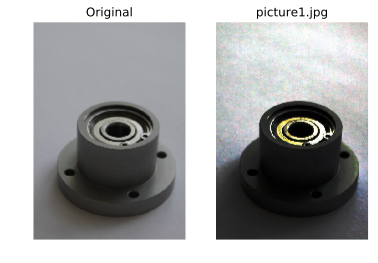

In [12]:
# Pfad zum Originalbild
data_path = 'C:/Users/Dennis/Desktop/TF_Images/ImgAugmentation'

# Anlegen des Augmentor-Objekts
p = Augmentor.Pipeline(data_path)
# Definieren der gewünschen Operation
p.histogram_equalisation(probability=1)

# Erzeugen eines Bildes
p.sample(1)


# Pfad zum neuen Bild
output_path = data_path + '/output/'
file_path = glob.glob(output_path +'*.jpg')[0]


os.remove(new_file)
old_file = os.path.join(file_path)
new_file = os.path.join(output_path, 'picture1.jpg')

os.rename(old_file, new_file)


image = cv2.imread(glob.glob(data_path +'/*.jpg')[0])
image_new = cv2.imread(new_file)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig = plt.figure(figsize=(25,25))
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original')
ax1.axis('off')
ax2.imshow(cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB))
ax2.axis('off')
ax2.set_title(new_file.split('/')[-1])

#Speichern des Bildes als pnk und pdf
plt.show()



Initialised with 1 image(s) found.
Output directory set to C:/Users/Dennis/Desktop/TF_Images/ImgAugmentation\output.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x1CA34D52B00>: 100%|█| 1/1 [00:00<00:00, 35.75 Samples/s]


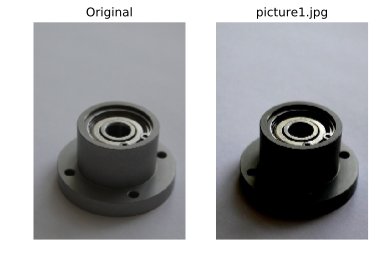

In [15]:
# Pfad zum Originalbild
data_path = 'C:/Users/Dennis/Desktop/TF_Images/ImgAugmentation'

# Anlegen des Augmentor-Objekts
p = Augmentor.Pipeline(data_path)
# Definieren der gewünschen Operation
p.random_contrast(probability=1,min_factor=1.8, max_factor=1.9)
# Erzeugen eines Bildes
p.sample(1)

# Pfad zum neuen Bild
output_path = data_path + '/output/'
file_path = glob.glob(output_path +'*.jpg')[0]

os.remove(new_file)
old_file = os.path.join(file_path)
new_file = os.path.join(output_path, 'picture1.jpg')

os.rename(old_file, new_file)


image = cv2.imread(glob.glob(data_path +'/*.jpg')[0])
image_new = cv2.imread(new_file)


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig = plt.figure(figsize=(25,25))
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original')
ax1.axis('off')
ax2.imshow(cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB))
ax2.axis('off')
ax2.set_title(new_file.split('/')[-1])


#Speichern des Bildes als pnk und pdf
# plt.savefig('random_contrast.png')
# plt.savefig('random_contrast.pdf', bbox_inches='tight')
#plt.imsave('test.png')
plt.show()




Initialised with 1 image(s) found.
Output directory set to C:/Users/Dennis/Desktop/TF_Images/ImgAugmentation\output.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x1CA35DB4C18>: 100%|█| 1/1 [00:00<00:00,  7.64 Samples/s]


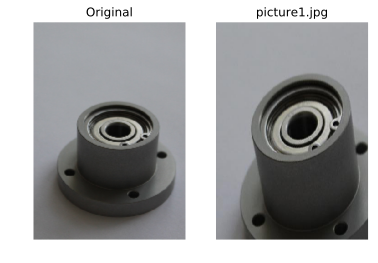

In [53]:
# Pfad zum Originalbild
data_path = 'C:/Users/Dennis/Desktop/TF_Images/ImgAugmentation'

# Anlegen des Augmentor-Objekts
p = Augmentor.Pipeline(data_path)
# Definieren der gewünschen Operation
p.rotate(probability=1, max_left_rotation=15, max_right_rotation=15)
# Erzeugen eines Bildes
p.sample(1)

# Pfad zum neuen Bild
output_path = data_path + '/output/'
file_path = glob.glob(output_path +'*.jpg')[0]

os.remove(new_file)
old_file = os.path.join(file_path)
new_file = os.path.join(output_path, 'picture1.jpg')

os.rename(old_file, new_file)


image = cv2.imread(glob.glob(data_path +'/*.jpg')[0])
image_new = cv2.imread(new_file)


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig = plt.figure(figsize=(25,25))
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original')
ax1.axis('off')
ax2.imshow(cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB))
ax2.axis('off')
ax2.set_title(new_file.split('/')[-1])


#Speichern des Bildes als pnk und pdf
# plt.savefig('random_contrast.png')
# plt.savefig('random_contrast.pdf', bbox_inches='tight')
#plt.imsave('test.png')
plt.show()




In [48]:
p.operations(GaussianNoise)

TypeError: 'list' object is not callable

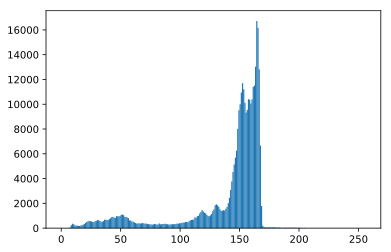

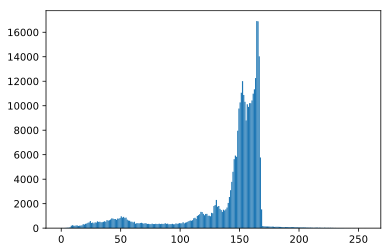

In [38]:
img1 = cv2.imread(glob.glob(data_path +'/*.jpg')[0],0)
plt.hist(img1.ravel(),256,[0,256]); plt.show()

img2 = cv2.imread(new_file,0)
plt.hist(img2.ravel(),256,[0,256]); plt.show()